## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_boston, load_wine

# Random Forest Classification (Wine)

In [3]:
wine = load_wine()

In [4]:
X = wine.data
y = wine.target

In [5]:
X.shape

(178, 13)

In [6]:
cross_val_score(RandomForestClassifier(random_state=1), X, y, cv=5).mean()

0.9499649229060994

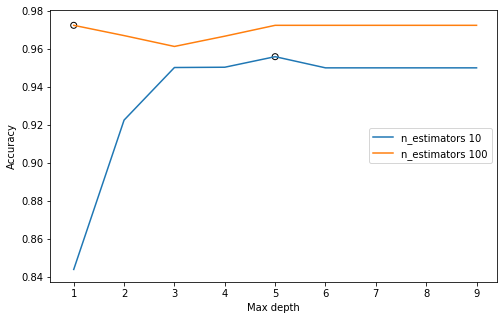

In [7]:
score =[]
score100 =[]
for i in range(1,10):
    score.append(cross_val_score(RandomForestClassifier(n_estimators=10, max_depth=i, random_state=1), X, y, cv=5).mean())
    score100.append(cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=i, random_state=1), X, y, cv=5).mean())
plt.figure(figsize=[8,5])
plt.plot(range(1,10), score, label='n_estimators 10')
plt.plot(range(1,10), score100, label='n_estimators 100')
plt.scatter(score.index(max(score))+1, max(score), marker='o', edgecolors='k', c='')
plt.scatter(score100.index(max(score100))+1, max(score100), marker='o', edgecolors='k', c='')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend(loc='center right')

In [8]:
print(f'max depth: {score.index(max(score))+1}\nscore: {max(score)}')
print(f'max depth: {score100.index(max(score100))+1}\nscore: {max(score100)}')

max depth: 5
score: 0.9558472758472758
max depth: 1
score: 0.9723458752870517


In [9]:
RFC = RandomForestClassifier(n_estimators=100, random_state=1, max_depth=5).fit(X, y)
pd.DataFrame([*zip(wine.feature_names, RFC.feature_importances_)], columns=['feature', 'importances'])

,feature,importances
0,alcohol,0.147355
1,malic_acid,0.019261
2,ash,0.013345
3,alcalinity_of_ash,0.021187
4,magnesium,0.032389
5,total_phenols,0.042472
6,flavanoids,0.164143
7,nonflavanoid_phenols,0.009655
8,proanthocyanins,0.021132
9,color_intensity,0.137753


# Random Forest Regression (Boston)

In [10]:
boston = load_boston()

In [11]:
X = boston.data
y = boston.target

In [12]:
X.shape

(506, 13)

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state = 1)

In [14]:
xtrain.shape

(354, 13)

In [15]:
RFR = RandomForestRegressor(random_state=1, n_estimators=100).fit(xtrain, ytrain)
score = RFR.score(xtest, ytest)
print(f'r2 score : {score}')

r2 score : 0.9077682271448745


In [16]:
pd.DataFrame([*zip(boston.feature_names, RFR.feature_importances_)], columns=['feature', 'importances'])

,feature,importances
0,CRIM,0.033189
1,ZN,0.001307
2,INDUS,0.007350
3,CHAS,0.001236
4,NOX,0.027189
5,RM,0.240283
6,AGE,0.024597
7,DIS,0.063002
8,RAD,0.004937
9,TAX,0.012312


#本次結論:

    紅酒數據(分類): 隨機森林 > 羅輯斯回歸 > 決策樹
    波士頓數據(回歸): 隨機森林 > 決策樹 > 線性回歸